In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
df=pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# UnderStanding DataSet
print(df.shape)
print()
print(df.head())
print()
df["Class"].value_counts()
print()
df.isnull().max()
print()
df.groupby("Class")["Amount"].describe()
print()
df["Time"].describe()
print()
df.groupby("Class")["Time"].describe()
print()


(284807, 31)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       

In [ ]:
# Check if 'Time' column exists before processing
if 'Time' in df.columns:
    df["Hour"] = (df["Time"] // 3600) % 24
    df = df.drop("Time", axis=1)

In [ ]:
# Features and Target

X = df.drop("Class" , axis=1)
y = df["Class"]

In [ ]:
X = X.copy()

In [ ]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2 , stratify=y)

In [ ]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = X_train.copy()
X_test  = X_test.copy()

X_train["Amount"] = scaler.fit_transform(X_train[["Amount"]])
X_test["Amount"]  = scaler.transform(X_test[["Amount"]])



In [ ]:
# Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# Evaluation

from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
print("PR-AUC   :", average_precision_score(y_test, y_prob))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.05601006922592826
Recall   : 0.9081632653061225
F1 Score : 0.1055127445168939
ROC-AUC  : 0.9717467670804957
PR-AUC   : 0.7215022924947778

Confusion Matrix:
 [[55364  1500]
 [    9    89]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.91      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [ ]:
# Threshold

thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    print(
        f"Threshold: {t:.2f}",
        "Recall:", round(recall_score(y_test, y_pred_t), 3),
        "Precision:", round(precision_score(y_test, y_pred_t), 3)
    )


Threshold: 0.10 Recall: 0.949 Precision: 0.008
Threshold: 0.15 Recall: 0.949 Precision: 0.012
Threshold: 0.20 Recall: 0.939 Precision: 0.016
Threshold: 0.25 Recall: 0.939 Precision: 0.021
Threshold: 0.30 Recall: 0.929 Precision: 0.026
Threshold: 0.35 Recall: 0.918 Precision: 0.032
Threshold: 0.40 Recall: 0.908 Precision: 0.039
Threshold: 0.45 Recall: 0.908 Precision: 0.047
Threshold: 0.50 Recall: 0.908 Precision: 0.056
Threshold: 0.55 Recall: 0.908 Precision: 0.066
Threshold: 0.60 Recall: 0.898 Precision: 0.079
Threshold: 0.65 Recall: 0.898 Precision: 0.094
Threshold: 0.70 Recall: 0.898 Precision: 0.111
Threshold: 0.75 Recall: 0.898 Precision: 0.13
Threshold: 0.80 Recall: 0.898 Precision: 0.155
Threshold: 0.85 Recall: 0.898 Precision: 0.184


In [45]:
# Gradient Boosting

from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(X_train, y_train)

hgb_prob = hgb.predict_proba(X_test)[:, 1]
hgb_pred = (hgb_prob >= 0.8).astype(int)

print("== HistGradientBoosting ==")
print("Precision:", precision_score(y_test, hgb_pred))
print("Recall   :", recall_score(y_test, hgb_pred))
print("F1 Score :", f1_score(y_test, hgb_pred))
print("ROC-AUC  :", roc_auc_score(y_test, hgb_prob))
print("PR-AUC   :", average_precision_score(y_test, hgb_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, hgb_pred))


== HistGradientBoosting ==
Precision: 0.5813953488372093
Recall   : 0.7653061224489796
F1 Score : 0.6607929515418502
ROC-AUC  : 0.8449859421117913
PR-AUC   : 0.6002146829178209
Confusion Matrix:
 [[56810    54]
 [   23    75]]


In [52]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score
)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=2,
    random_state=42,
    class_weight="balanced_subsample",
    n_jobs=-1
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

print("== Random Forest ==")

print("Precision:", precision_score(y_test, rf_pred))
print("Recall   :", recall_score(y_test, rf_pred))
print("F1 Score :", f1_score(y_test, rf_pred))
print("ROC-AUC  :", roc_auc_score(y_test, rf_prob))
print("PR-AUC   :", average_precision_score(y_test, rf_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


== Random Forest ==
Precision: 0.81
Recall   : 0.826530612244898
F1 Score : 0.8181818181818182
ROC-AUC  : 0.9786689401421795
PR-AUC   : 0.8338826210520783
Confusion Matrix:
 [[56845    19]
 [   17    81]]


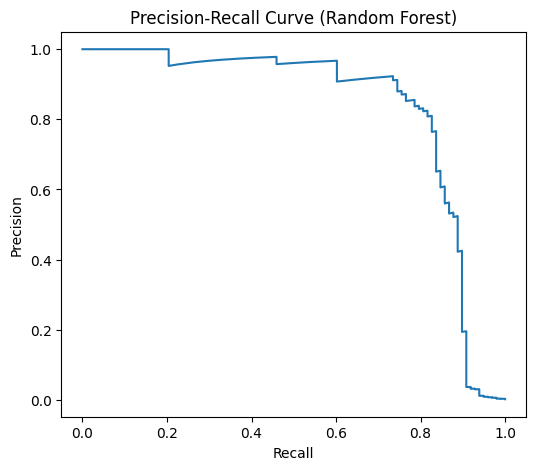

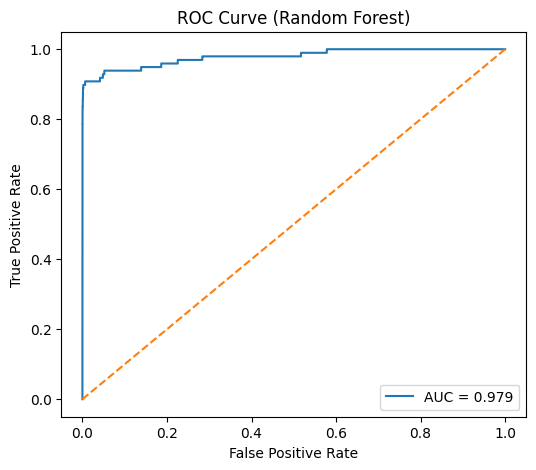

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, rf_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest)")
plt.legend()
plt.show()


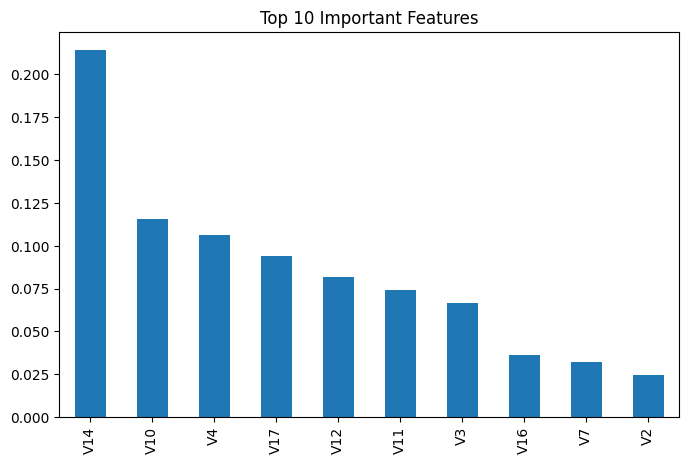

In [54]:
# Feature Importance

import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10).plot(kind="bar", figsize=(8,5), title="Top 10 Important Features")
plt.show()